## Machine Learning With Python

In this mini-projetct, I will use machine learning techniques to predict whether or not patients have diabetes. To do this, I will use the "Pima Indians Diabetes" dataset, which consist of several independent variables and one target as we can se below. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. I will build machine learning models to predict wheter a patient has diabetes based on diagnostic measurements.

Dataset: Pima Indians Diabetes Data Set
https://www.kaggle.com/uciml/pima-indians-diabetes-database

### Features information:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

## Exploring Data

### For a better understanding of the dataset, I will explore it.

###  Numerical Exploration

First, let's load all necessary libraries and read the csv file with the dataset.

In [1]:
# Reaging the dataset
from pandas import read_csv
file = 'pima-data.csv'
# Setting the columns names
columns = ['preg', 'plas', 'pres', 'skin','test', 'mass', 'pedi', 'age', 'class']
# Reading 
data = read_csv(file, names = columns)
print(data.shape)

(768, 9)


In [2]:
# Importing libraries 
import sklearn as sl
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'0.18.1'

As we can see below, the dataset has no string variables, so We won't need to convert it into numerical variable in order to use it in our analysis and machine learning model. 

In [3]:
# visualizing the first 10 rows
data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It's also important to check the dataset dimension. The number of rows and columns may affect the time and quality of the training. For instance, too many rows may contribuit for a longer training time. On the other hand, we may have poor results if we use just a few rows to training our model. In addition, with a large number of columns, the algorithm performance may be negatively affected due to the high dimensionality of it.


In [4]:
# Dataset dimension
data.shape

(768, 9)

Let's confirm the columns data type. It's important to check if We have string in our dataset and whether a column represents a categorical variable or not. After that, We will take a look at the basic statistics of our features.

In [5]:
# checking data types
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [6]:
# statistics information
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It is essential to have a balanced number of classes, in terms of observations. An unbalanced dataset may affect negatively our model. 

As We can see below, our dataset the classes are unbalanced and it may affect our model.


In [7]:
data.groupby('class').size()

class
0    500
1    268
dtype: int64

The correlation give us the relationship between two variables. The most used is the Pearson method, which assumes the normal distribution of the data. Correlation of -1 means a negative correlation, while correlation of +1 means a positive correlation. Variables with correlation equal to zero, have no relationship. Let's check the correlation between the variables in our dataset.

In [8]:
#Pearson correlation
data.corr(method = 'pearson')


,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Many machine learning algorithms consider the data distribuition as normal (bell curve). For a better predictive model, it is crucial to know the symmetry of the dataset in order to deliver to the algorithm the best input. 

Let's use the skew function to identify the skewness of our dataset. A normally distribuited data has a skewness close to zero. On the other hand, skewness greather than zero means that there is more weight in the left tail of the data distributuin.

In [9]:
data.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

### Data Visualization

In [10]:
# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# importing seaborn
import seaborn as sns

Let's plot histograms of each variable to analyse the distribution of each feature. As we know, a histogram group data in bins and give us the number of observation in each bin. We can rapidally verify the symmetry of each feature and whether a variable has a normal distribution or not. In addition, this plot helps us to identify outliers.

As We can see below, the variables age, pedi and test have an exponential distribution. Also, We can easily see that the variables mass and press have a normal distribution.

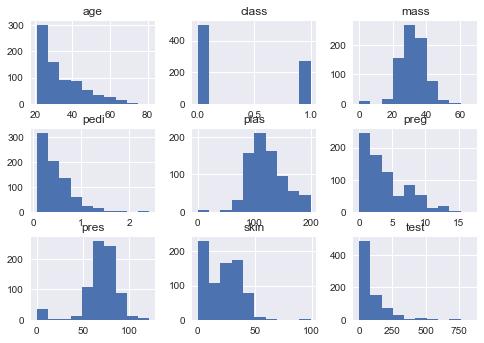

In [11]:
data.hist()
plt.show()

We can also use the density plot to visualize the data distribution or even plot the histogram and the density plot of each variable in the same graph, as We can see below. 

[]

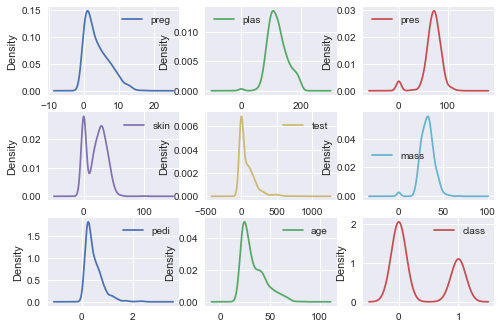

In [170]:
# Density Plot
data.plot( kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.plot()

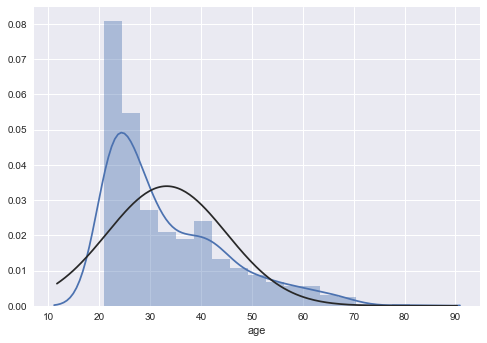

In [74]:
from scipy import stats
sns.distplot(data.age, fit = stats.norm);

A boxplot helps us to have an idea of the data dispersion and the possibles outliers. In addition, this plot shows us the distribuition of each feature. The central line (red) is the median ( quartile 50%), the line below the box is the quartil 25% and the line above the box is the quartile 75%.

We can see that the data dispersion is really different for each feature.  The age, skin and test columns have a closely symmetry in small quantity of data.



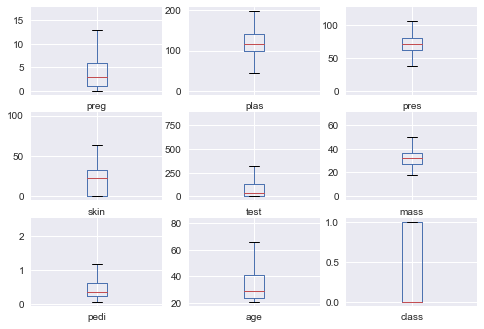

In [14]:
data.plot( kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()



Let's plot a correlation matrix to visualize the correlation between the features. 

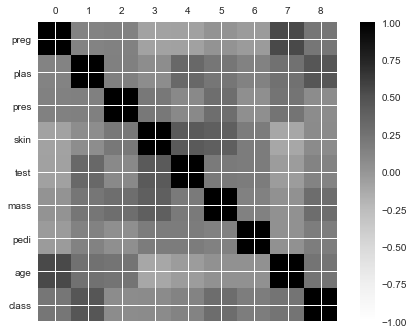

In [16]:
correlations = data.corr()

# Plot 
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(columns)
ax.set_yticklabels(columns)
plt.show()

We can also visualize the relationship between two variables with scatter plot. 

In [ ]:
from pandas import scatter_matrix
scatter_matrix(data)
plt.show()

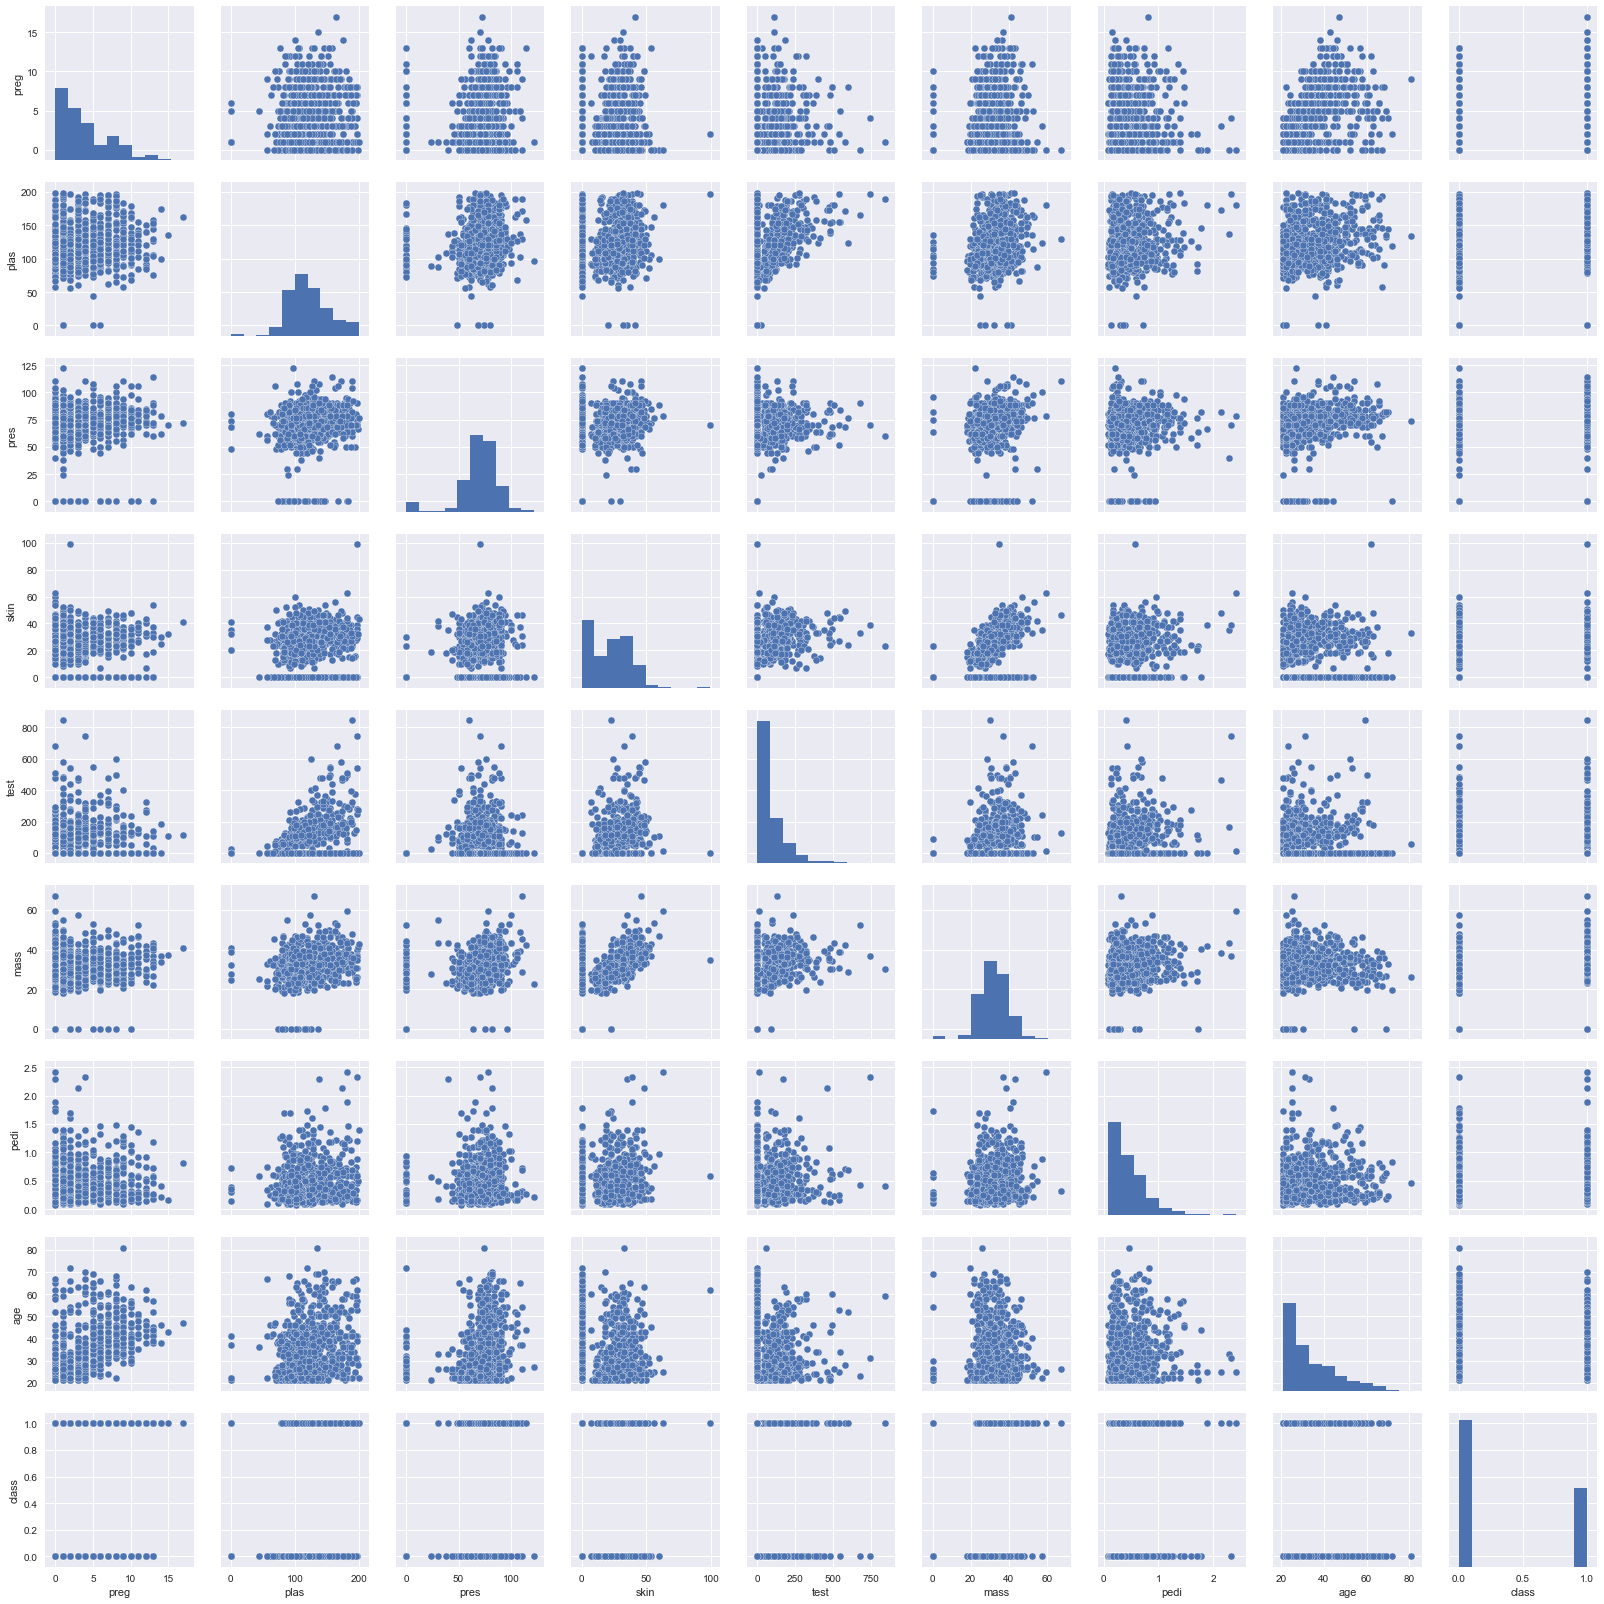

In [18]:
# pairplot
sns.pairplot(data)

## Feature selection 

The features which We use as training dataset Will strongly affect the accuracy of our model. Besides, irrelevant features (noisy or non informative features) may affect negatively the model performance. That's the reason why We have to select the features that are best candidate to be our predictor variable and, consequently, improve our model performance.


In short, the feature selection, helps us to choose the best feature of our model. As a consequence of it, this technique may prevent overfitting, increase the accuracy and decrease training time of the model. 

### Univariate Selection


The univariate selection approach selects the best features based on univariate statistical tests. In this case, We will use the chi-squared test to select 4 features what will be used as predictors variables.

So, let's use the SelectKBest function in our feature selection. This function returns the scores of each varibable, and based on that We will choose only the 4 first scores. 

In [22]:
# importing modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Spliting the data into input and output ( The class column is our target)
array = data.values
X = array[:,0:8]
Y = array[:,8]


# Extracting variables - Let's define the parameter "score_func = chi2" and "k = 4" which means that We want to apply 
# the chi-squared test to select 4 features.

test = SelectKBest(score_func = chi2, k = 4)
fit = test.fit(X,Y)

#  Summarizing Scores 
print("Scores:")
print(fit.scores_)
features = fit.transform(X)

print()

# Summarizing Selected features
print('Selected features:')
print(features[0:5,:])


Scores:
[  111.51969064  1411.88704064    17.60537322    53.10803984  2175.56527292
   127.66934333     5.39268155   181.30368904]

Selected features:
[[ 148.     0.    33.6   50. ]
 [  85.     0.    26.6   31. ]
 [ 183.     0.    23.3   32. ]
 [  89.    94.    28.1   21. ]
 [ 137.   168.    43.1   33. ]]


As We can see the features with highest scores are : plas,test,mass and age. Based on this, let's create another dataframe with this features and the target.

In [23]:
# Converting the selected features into a dataframe
from pandas import DataFrame
selected_features = DataFrame(features)
selected_features.head()

,0,1,2,3
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


In [24]:
#Setting names to the columns 
selected_features.rename(columns = { 0 : "plas", 1 : "test", 2 : "mass", 3 : "age"}).head()

,plas,test,mass,age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


In [25]:
selected_features['class'] = data['class']
selected_features.head()

,0,1,2,3,class
0,148.0,0.0,33.6,50.0,1
1,85.0,0.0,26.6,31.0,0
2,183.0,0.0,23.3,32.0,1
3,89.0,94.0,28.1,21.0,0
4,137.0,168.0,43.1,33.0,1


# Data Preprocessing

We know that each algorithm needs a different kind of processed data as input. This means that the data processing depend on the kind of algorithm We want to use in our model. Based on that, let's process our data with 2 different techniques : data normalization and data standardization.

 https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

### Data Standardization


Standardzation is crucial for those algorithms that expect a dataset with a gaussian distribuition such as linear regression, logistic regression and linear discriminant analysis. This process transforms a normally distributed random variable with mean u and standard deviation s into a standard normal random variable with mean 0 and standard deviation equals to 1. 

In [62]:
#data Staddardzation
from sklearn.preprocessing import StandardScaler
array = selected_features.values

#Spliting the data into input and output ( The class column is our target)
X = array[:,0:4]
Y = array[:,4]

# Standrdizing the data
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

print(standardX)

[[ 0.84832379 -0.69289057  0.20401277  1.4259954 ]
 [-1.12339636 -0.69289057 -0.68442195 -0.19067191]
 [ 1.94372388 -0.69289057 -1.10325546 -0.10558415]
 ..., 
 [ 0.00330087  0.27959377 -0.73518964 -0.27575966]
 [ 0.1597866  -0.69289057 -0.24020459  1.17073215]
 [-0.8730192  -0.69289057 -0.20212881 -0.87137393]]


### Data Normalization 

The normalizer function rescales each input row to have unit norm. This process does not depend on the distribution of the samples.In addition, the normalization is very helpful when the dataset is sparse ( too many zeros) and a large range scale. It is mostly used in neural network algorithms and algorithms which uses measurement of distances, such as KNN.

In [66]:
# Data Normalization
from sklearn.preprocessing import Normalizer

#Spliting the data into input and output ( The class column is our target)
array = selected_features.values
X = array[:,0:4]
Y = array[:, 4]

# Normalizing
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

print(normalizedX[0:5,:])

[[ 0.92621356  0.          0.21027551  0.31290999]
 [ 0.90132435  0.          0.2820615   0.32871829]
 [ 0.97739608  0.          0.12444442  0.17091079]
 [ 0.66359526  0.70087589  0.20951716  0.15657866]
 [ 0.61305296  0.75177297  0.19286557  0.14766969]]


## Model Selection

Lets create six models and select the one with best result. I've developed the models using all of the input datasets ( normalized, standartized and the no processed input. The last one, gave me the best result.  

name:LR - mean: 0.7644 - std: 0.0513
name:LDA - mean: 0.7683 - std: 0.0543
name:NB - mean: 0.7565 - std: 0.0448
name:KNN - mean: 0.7188 - std: 0.0730
name:CART - mean: 0.6704 - std: 0.0614
name:SVM - mean: 0.6445 - std: 0.0709


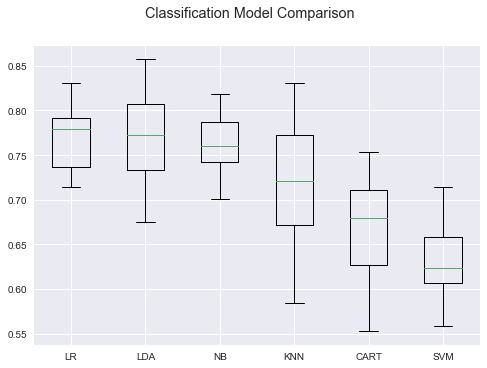

In [173]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



# Defining the stantardized data as input and the class column as target

#Standardized X
#X = standardX

#Normalized X
#X = normalizedX

# Not normalized X: 
X = array[:,0:4]
Y = selected_features['class'] 

# number of folds
num_folds = 10
num_instances = len(X)
seed = 7

# Preparing all models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# Creating our models
results = []
names = []


for name, model, in models:
    kfold = model_selection.KFold(n_splits = num_folds, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X,Y, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print('name:{} - mean: {:.4f} - std: {:.4f}'.format(name,cv_results.mean(), cv_results.std()))
    
#boxplot
fig = plt.figure()
fig.suptitle('Classification Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()